# ENSF 544 Data Science for Software Engineers

## Phase 2

#### By: Kyle Friedt, Erslan Salman, Kelvin Tran and Avneet Gill

In this phase of the project we will attempt to solve three different questions about wine data using regression, classification, and clustering approaches. We will be repeating the approaches above after performing a dimension reduction using `pca`. The three questions we are answering are:
1. Predicting wine qualities using regression
2. Binary classification of wines as red and white using classification 
3. Prediciting if a wine falls into `good-white`, `bad-white`, `good-red` and `bad-red` using clustering

Before solving these questions, we did an exploration of the data to understand any differences or trends that may exist in our data set.

## Exploration

Here we will explore our two datasets (red and white wines) individually before we combine them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

white_path = "wine-white.csv"
red_path = "wine-red.csv"


red_df = pd.read_csv(red_path)
white_df = pd.read_csv(white_path)
print("White Wine Data:")
white_df

White Wine Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
print("Red Wine Data:")
red_df

Red Wine Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


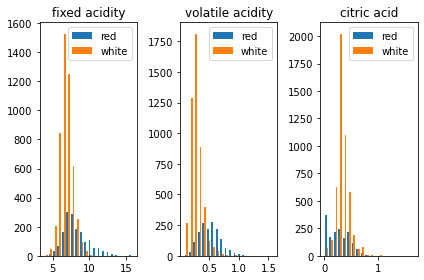

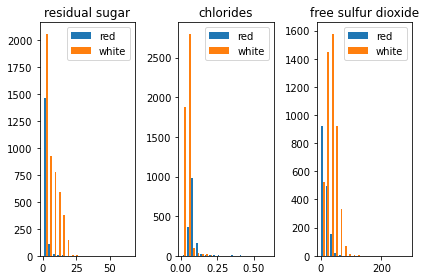

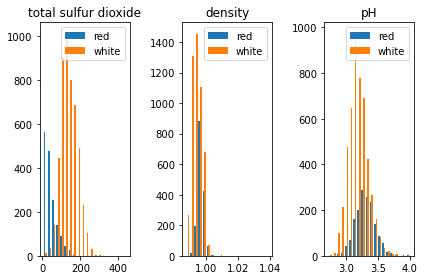

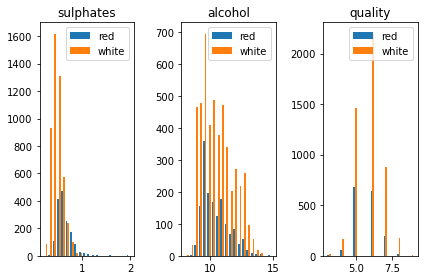

In [3]:
# generate histograms for different parameters

num_bins = 20
num_hist_cols = 3
def gen_data(col_name):
    rdata = red_df[col_name].to_numpy()
    wdata = white_df[col_name].to_numpy()
    return [rdata, wdata]

def gen_hist(cols, num_bins):
    fig, axes = plt.subplots(nrows=1, ncols=len(cols))
    lgnd = ['red', 'white']
  
    for i in range(len(cols)):
        data = gen_data(cols[i])
        axes[i].hist(data, num_bins, label = lgnd)
        axes[i].set_title(cols[i])
        axes[i].legend(loc='upper right')
#     fig.figsize = (2,8)  # need to figure out how to make these wider
    fig.tight_layout()
    plt.show()
    
# generate the plots three at a time
labels = list(red_df.columns)
for i in range(0,12,num_hist_cols):
    names = labels[i:i+num_hist_cols]
    gen_hist(names, num_bins)
    


The graphs above compare different features for both red and white wines. This is usefull information as it provides insight on any trends that may exist in the data, for example we can see that the `total sulfur dioxide` in red and white wines is relatively distinct compares to other features.

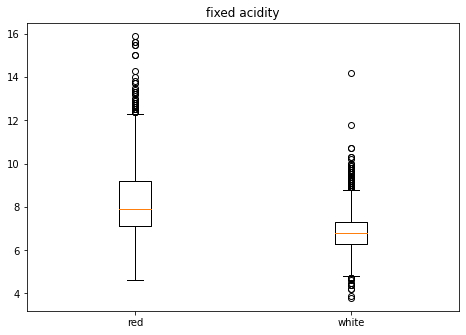

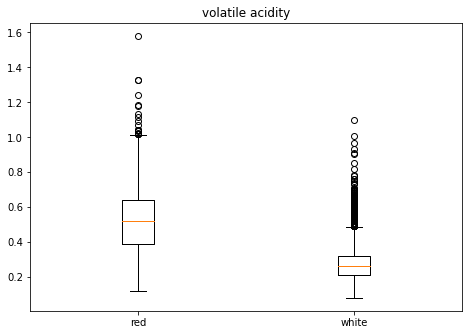

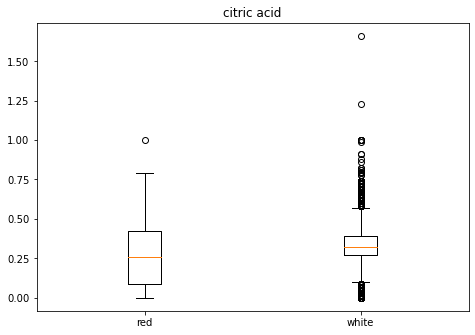

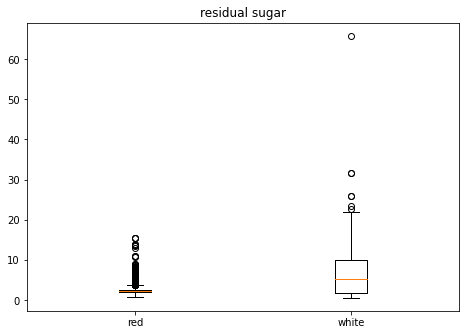

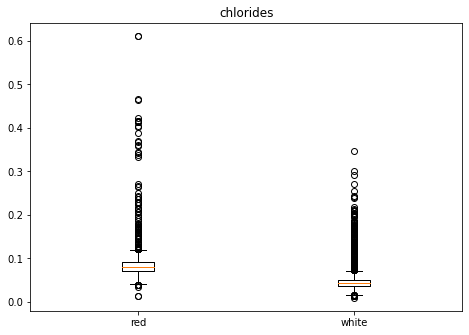

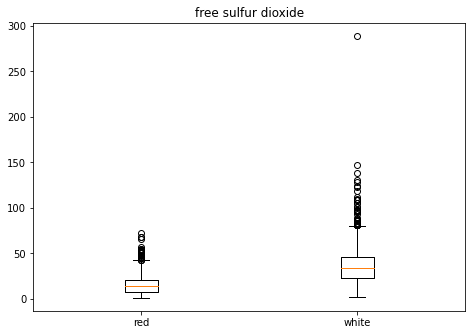

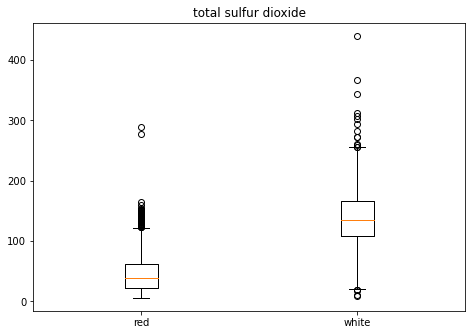

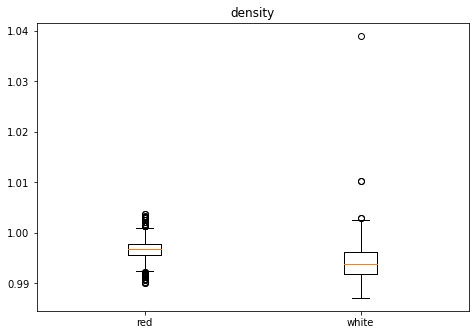

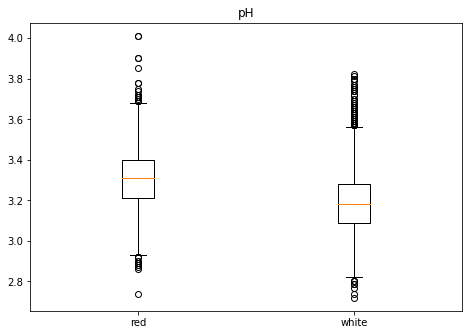

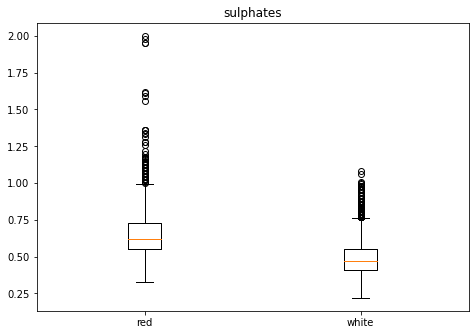

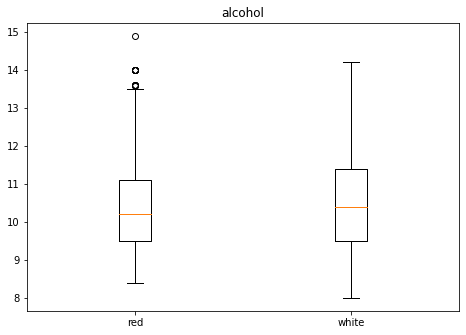

In [4]:
def gen_boxplot(col_names):
    lgnd = ['red', 'white']
    # potentially see if you could get two box plotes next to each other 
    for i in range(len(col_names)):
        data = gen_data(col_names[i])
        fig = plt.figure(figsize = (6,4))
        ax = fig.add_axes([0, 0, 1, 1])
        ax.set_title(col_names[i])
        bplt = ax.boxplot(data, labels=lgnd)
   
    plt.show()

num_box_col = 1 # change this once you figure out how to get box plots next to each other
box_labels = labels[:-1]
for i in range(0,12,num_box_col):
    names = box_labels[i:i+num_box_col]
    gen_boxplot(names)

The plots above show the range of values for each of the features for red and white wines. Again this information helps us compare any differences or trends among the two data sets. 

# Section 1 Question 1
## Predicting Wine Qualities Using Regression

---------- Insert a bit on what is done in this question (overview) --------

### Section 1.1 Reading in and Populating DataFrames

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
white_path = "wine-white.csv"
red_path = "wine-red.csv"

def import_merge_df(file_name1, file_name2):
    df1 = pd.read_csv(file_name1)
    df2 = pd.read_csv(file_name2)
    print(df1.shape)
    print(df2.shape)
    # merge the dataframes 
    df = pd.concat([df1, df2], ignore_index=True)
    return df


df = import_merge_df(red_path, white_path)
df

(1599, 12)
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Section 1.2 Setup data
Tested a few seeds to find one where the quality median and mean was similar in the training set and testing set. The median did not give us any meaningful insight into the seed. The range of quality values was small so all of the seeds ended up having the same median. We ended up using the mean to determine which seed we should use.

In [6]:
# generate features and labels
features = df.drop('quality', 1)
labels = df['quality']
# The median didn't tell us much about the data set, labels are pretty narrow. 
print(labels.name+ ' median')
print(labels.median())


# reported and reviewed the mean as well
print(labels.name+ ' mean')
print(labels.mean())

# optimize seeds so the test and train data has similar mean quality
def test_seeds():
    test_prop = 0.25
#     seed = 23
    seeds = range(3000, 3010)
    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                        test_size = test_prop, random_state = seed)
        
        # change this to median
        print(seed)
        print('train median: %d , test median: %d , train mean: %f , test mean: %f ' 
              % (y_train.median(), y_test.median(), y_train.mean(), y_test.mean()))

        
test_seeds()

quality median
6.0
quality mean
5.818377712790519
3000
train median: 6 , test median: 6 , train mean: 5.825123 , test mean: 5.798154 
3001
train median: 6 , test median: 6 , train mean: 5.818350 , test mean: 5.818462 
3002
train median: 6 , test median: 6 , train mean: 5.817118 , test mean: 5.822154 
3003
train median: 6 , test median: 6 , train mean: 5.821223 , test mean: 5.809846 
3004
train median: 6 , test median: 6 , train mean: 5.817529 , test mean: 5.820923 
3005
train median: 6 , test median: 6 , train mean: 5.814450 , test mean: 5.830154 
3006
train median: 6 , test median: 6 , train mean: 5.821839 , test mean: 5.808000 
3007
train median: 6 , test median: 6 , train mean: 5.824507 , test mean: 5.800000 
3008
train median: 6 , test median: 6 , train mean: 5.829844 , test mean: 5.784000 
3009
train median: 6 , test median: 6 , train mean: 5.812192 , test mean: 5.836923 


In [7]:
# use 3001 as the seed

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, 
                                                    random_state = 3001)

alphas = np.arange(0.0,10.1,0.1)
print(alphas)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


### Finding ideal number of components and applying PCA

,explained variance
0,0.000000
1,0.726701
2,0.944201
3,0.972817
4,0.988385
5,0.998697
6,0.999593
7,0.999811
8,0.999924
9,0.999987


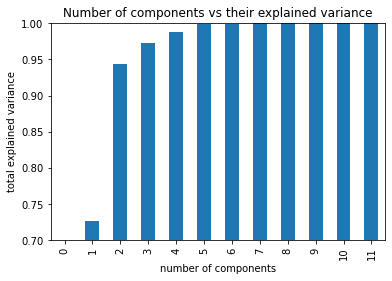

In [8]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
#scale data first
features_norm = normalize(features)
#fixed seed for comparing different n_component numbers
seed = 5026
pca_X_train, pca_X_test = train_test_split(features_norm, test_size=0.25, random_state=seed)

variance={'explained variance':[]}

for k in range(0,12):
    pca = PCA(n_components=k).fit(pca_X_train)
    variance['explained variance'].append(pca.explained_variance_ratio_.sum())

df = pd.DataFrame(variance)

ax = df.plot.bar(ylim=(0.70,1.001),title="Number of components vs their explained variance")
ax.set_xlabel("number of components")
ax.set_ylabel("total explained variance")
ax.get_legend().remove()

df

The graph above shows different components and their explained variances. There is no way to get 100% explained variation, however it is possible to get close. In `Jake VanderPlas`'s `Python Data Science Handbook` he states that having anywhere over 90% of the total variance explained is good enough to model the dataset. In our case all of the explained variances for components higher than or equal to 2 have sufficient explained variance. We will initially investigate other values to determine if more than 2 would be useful. 


In [9]:
# Function to run PCA with a model and vary the number of parameters
def eval_pca_n(model,n, X_train, X_test, y_train, y_test):
    
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    model.fit(X_train, y_train)
    print("Training set score with PCA: %f" % model.score(X_train, y_train))
    print("Testing set score with PCA : %f" % model.score(X_test, y_test))
    score_train = lr_pca.score(X_train, y_train)
    score_test = lr_pca.score(X_test, y_test)
    return score_train, score_test
    

### Section 1.3 Testing Various Regression Models with Different Alpha Values 

We will perform the same tests with non scaled, scaled data, and pca data to see how that affects the models.

### Section 1.3.1 Linear Regression (Non-Scaled)

#### Section 1.3.1.1 Linear Regression (Non-Scaled)

In [10]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: %f" % lr.score(X_train, y_train))
print("Testing set score: %f" % lr.score(X_test, y_test))
lr_score_train = lr.score(X_train, y_train)
lr_score_test = lr.score(X_test, y_test)
print(lr_score_train)

Training set score: 0.297718
Testing set score: 0.273965
0.2977184292827676


#### Section 1.3.1.2 Linear Regression (Scaled)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sc_lr = LinearRegression().fit(X_train_scaled, y_train)
print("Training set score: %f" % sc_lr.score(X_train_scaled, y_train))
print("Testing set score: %f" % sc_lr.score(X_test_scaled, y_test))
sc_lr_score_train = sc_lr.score(X_train_scaled, y_train)
sc_lr_score_test = sc_lr.score(X_test_scaled, y_test)
print(sc_lr_score_train)

Training set score: 0.297718
Testing set score: 0.273965
0.29771842928276804


In [12]:
lr_pca = LinearRegression()
pca_lr_score_train = None
pca_lr_score_test = None
for n_components in range(2,7):
    print('Number of Components: %d' %n_components)
    pca_lr_score_train, pca_lr_score_test = eval_pca_n(lr_pca, n_components, pca_X_train, 
                                                   pca_X_test, y_train, y_test)

Number of Components: 2
Training set score with PCA: 0.000118
Testing set score with PCA : -0.000035
Number of Components: 3
Training set score with PCA: 0.000145
Testing set score with PCA : -0.000138
Number of Components: 4
Training set score with PCA: 0.000201
Testing set score with PCA : -0.000386
Number of Components: 5
Training set score with PCA: 0.000202
Testing set score with PCA : -0.000387
Number of Components: 6
Training set score with PCA: 0.000218
Testing set score with PCA : -0.000284


- PCA did not show any significant improvements.
- Since we are trying to reduce the number of componenets as far as possible, we chose 2 as the number of components to use. 

#### Section 1.3.1.3 Comparing Scaled vs Non-Scaled Results 

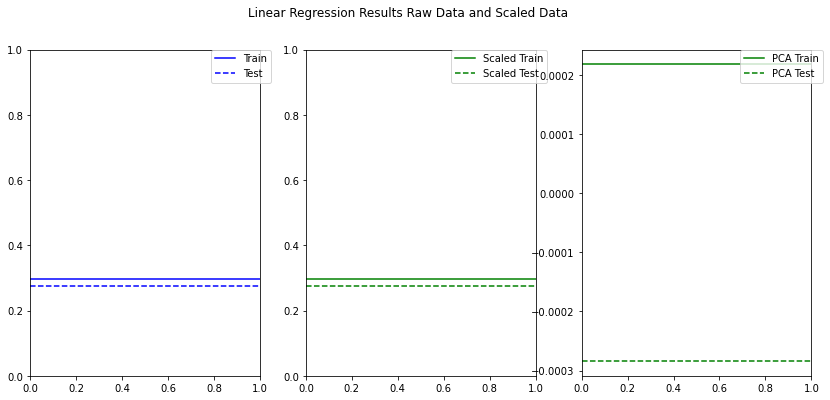

In [13]:
# figure of scaled and non scaled
def plot_lr_data(d1,d2,d3,d4,d5,d6):
    
    f, ax = plt.subplots(1, 1, figsize = (14,6))
    
    plt.subplot(131)
    plt.axhline(d1, c='b', linestyle='-', label= 'Train')
    plt.axhline(d2, c='b', linestyle='--', label= 'Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
    plt.suptitle("Linear Regression Results Raw Data and Scaled Data")
    
    plt.subplot(132)
    plt.axhline(d3, c='g', linestyle='-', label= 'Scaled Train')
    plt.axhline(d4, c='g', linestyle='--', label= 'Scaled Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
    
    plt.subplot(133)
    plt.axhline(d5, c='g', linestyle='-', label= 'PCA Train')
    plt.axhline(d6, c='g', linestyle='--', label= 'PCA Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)

    plt.show()
    
plot_lr_data(lr_score_train, lr_score_test, sc_lr_score_train, sc_lr_score_test,pca_lr_score_train,pca_lr_score_test)


As we can see above scaling had no effect on the linear regression model. Next we will use different regression models and iterate through alpha parameters to find the best result.

The alpha parameters are used to help avoid overfitting the data to the training set. This should help improve the accuracy on the testing set.

### Section 1.3.2 Ridge 
#### Section 1.3.2.1 Training Using Scaled and Non-Scaled Data

In [14]:
ridge_tr_score = list()
ridge_tst_score = list()
sc_ridge_tr_score = list()
sc_ridge_tst_score = list()
ridge_pca_tr_score = list()
ridge_pca_tst_score = list()

for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(X_train, y_train)
    ridge_tr_score.append(ridge.score(X_train, y_train))
    ridge_tst_score.append(ridge.score(X_test, y_test))    
    ridge = Ridge(alpha = alpha).fit(X_train_scaled, y_train)
    sc_ridge_tr_score.append(ridge.score(X_train_scaled, y_train))
    sc_ridge_tst_score.append(ridge.score(X_test_scaled, y_test))
    ridge = Ridge(alpha = alpha).fit(pca_X_train, y_train)
    ridge_pca_tr_score.append(ridge.score(pca_X_train, y_train))    
    ridge_pca_tst_score.append(ridge.score(pca_X_test, y_test))

    
ridge_df = pd.DataFrame()
ridge_df['Training Score'] = ridge_tr_score
ridge_df['Test Score'] = ridge_tst_score 
ridge_df['Scaled Training Score'] = sc_ridge_tr_score
ridge_df['Sclaed Test Score'] = sc_ridge_tst_score
ridge_df['PCA Training Score'] = ridge_pca_tr_score
ridge_df['PCA Test Score'] = ridge_pca_tst_score
print('The best result for Ridge was: %.4f' % max(ridge_tst_score))
ridge_df

The best result for Ridge was: 0.2740


,Training Score,Test Score,Scaled Training Score,Sclaed Test Score,PCA Training Score,PCA Test Score
0,0.297718,0.273965,0.297718,0.273965,0.000948,-0.001361
1,0.295254,0.272793,0.297678,0.273980,0.000384,-0.000415
2,0.295183,0.272747,0.297586,0.273932,0.000307,-0.000365
3,0.295157,0.272728,0.297472,0.273849,0.000277,-0.000347
4,0.295141,0.272716,0.297350,0.273749,0.000259,-0.000335
...,...,...,...,...,...,...
96,0.294090,0.270189,0.289873,0.264708,0.000159,-0.000098
97,0.294077,0.270157,0.289787,0.264611,0.000158,-0.000097
98,0.294063,0.270125,0.289702,0.264515,0.000158,-0.000097
99,0.294049,0.270093,0.289616,0.264418,0.000158,-0.000096


#### Section 1.3.2.2 Comparing Scaled vs Non-Scaled Results 

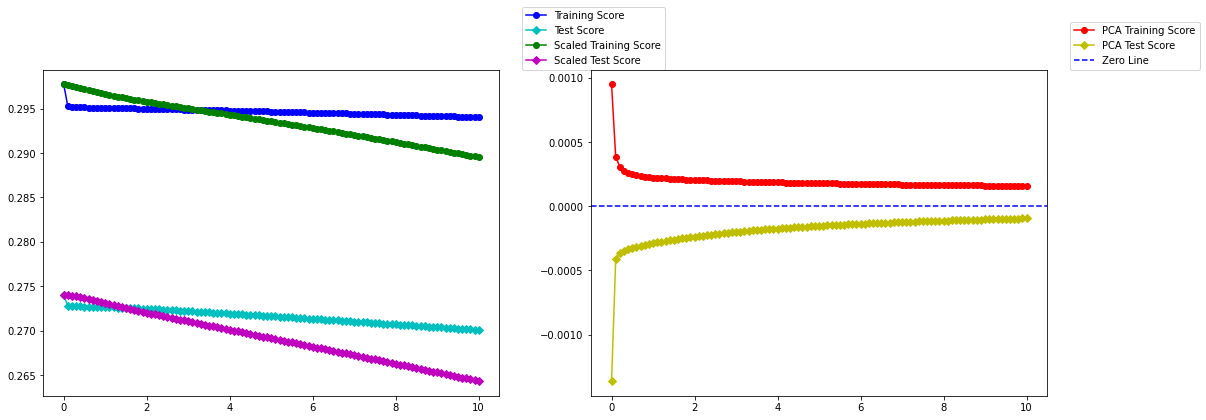

In [15]:
# plot the scaled, non scaled, and pca

def plot_lr_alphas(d1,d2,d3,d4,d5,d6,labels):
    f, ax = plt.subplots(1, 2, figsize = (18,6))
    plt.subplot(121)
    plt.plot(labels, d1, 'b', marker='o', label='Training Score')
    plt.plot(labels, d2, 'c', marker='D', label='Test Score')
    plt.plot(labels, d3, 'g', marker='o', label='Scaled Training Score')
    plt.plot(labels, d4, 'm', marker='D', label='Scaled Test Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.)
    plt.subplot(122)
    plt.plot(labels, d5, 'r', marker='o', label='PCA Training Score')
    plt.plot(labels, d6, 'y', marker='D', label='PCA Test Score')
    plt.axhline(0, c='b', linestyle='--', label= 'Zero Line')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.)
    plt.show()

plot_lr_alphas(ridge_tr_score, ridge_tst_score, sc_ridge_tr_score, sc_ridge_tst_score,
               ridge_pca_tr_score,ridge_pca_tst_score,alphas)

With ridge regularization the scaled test scores performed better with alpha values below 1.8. After that point the model with the reaw feature data performed better. 

We also saw that as the training accuracy went down so did the testing accuracy. This indicates that overfitting was not really a problem. Our models low performance score is more so based on how well these features can be used to predict the wine quality. 

### Section 1.3.3 Lasso
#### Section 1.3.3.1 Training Using Scaled and Non-Scaled Data

In [16]:
lasso_tr_score = list()
lasso_tst_score = list()
sc_lasso_tr_score = list()
sc_lasso_tst_score = list()
num_coef = list()
lasso_PCA_tr_score = list()
lasso_PCA_tst_score = list()
for alpha in alphas:

    lasso = Lasso(alpha = alpha, max_iter = 100000).fit(X_train, y_train)
    lasso_tr_score.append(lasso.score(X_train, y_train))
    lasso_tst_score.append(lasso.score(X_test, y_test))
    num_coef.append(np.sum(lasso.coef_ != 0))
    sc_lasso = Lasso(alpha = alpha, max_iter = 100000).fit(X_train_scaled, y_train)
    sc_lasso_tr_score.append(sc_lasso.score(X_train_scaled, y_train))
    sc_lasso_tst_score.append(sc_lasso.score(X_test_scaled, y_test))
    lasso_pca = Lasso(alpha = alpha, max_iter = 100000).fit(pca_X_train, y_train)
    lasso_PCA_tr_score.append(lasso_pca.score(pca_X_train, y_train))    
    lasso_PCA_tst_score.append(lasso_pca.score(pca_X_test, y_test))
    

lasso_df = pd.DataFrame()
lasso_df['Training Score'] = lasso_tr_score
lasso_df['Test Score'] = lasso_tst_score 
lasso_df['Scaled Training Score'] = sc_lasso_tr_score
lasso_df['Scaled Test Score'] = sc_lasso_tst_score
lasso_df['PCA Training Score'] = lasso_PCA_tr_score
lasso_df['PCA Test Score'] = lasso_PCA_tst_score  
lasso_df['Number of Features'] = num_coef
    
print('The best result for Lasso was: %.4f' % max(lasso_tst_score))
lasso_df

The best result for Lasso was: 0.2740


,Training Score,Test Score,Scaled Training Score,Scaled Test Score,PCA Training Score,PCA Test Score,Number of Features
0,0.297718,2.739652e-01,0.297718,2.739652e-01,0.000948,-1.361267e-03,11
1,0.223449,1.884751e-01,0.000000,-1.577210e-08,0.000000,-1.577210e-08,4
2,0.187850,1.604188e-01,0.000000,-1.577210e-08,0.000000,-1.577210e-08,3
3,0.137403,1.193728e-01,0.000000,-1.577210e-08,0.000000,-1.577210e-08,3
4,0.066794,5.879134e-02,0.000000,-1.577210e-08,0.000000,-1.577210e-08,3
...,...,...,...,...,...,...,...
96,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0
97,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0
98,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0
99,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0.000000,-1.577210e-08,0


#### Section 1.3.3.2 Comparing Scaled vs Non-Scaled Results

Anything with an alpha higher than 1 gave us very poor results, so we will exclude those from our graph.

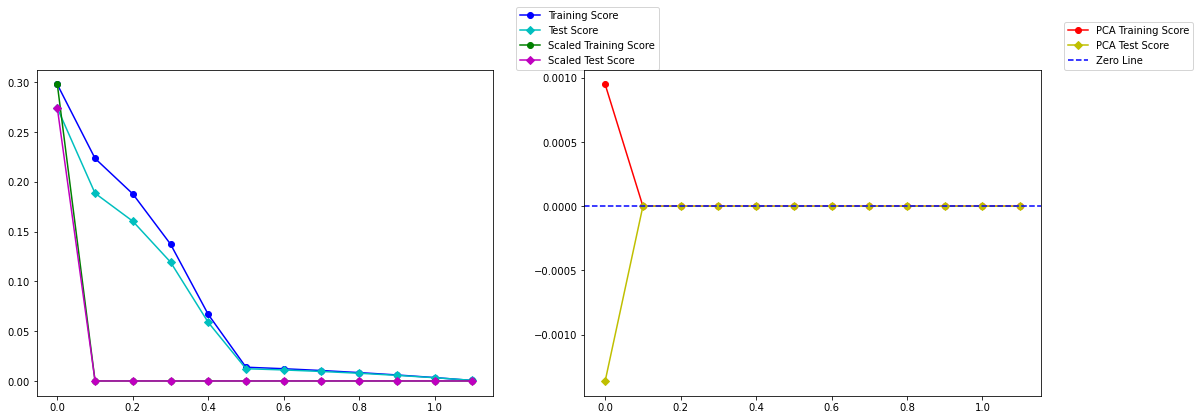

In [17]:
plot_lr_alphas(lasso_tr_score[:12], lasso_tst_score[:12], sc_lasso_tr_score[:12],
               sc_lasso_tst_score[:12],lasso_PCA_tr_score[:12],lasso_PCA_tst_score[:12],alphas[:12])

### Section 1.3.7 Results

Visulaizations of the data, need to show the results for all 3 with and with out scaled data. 

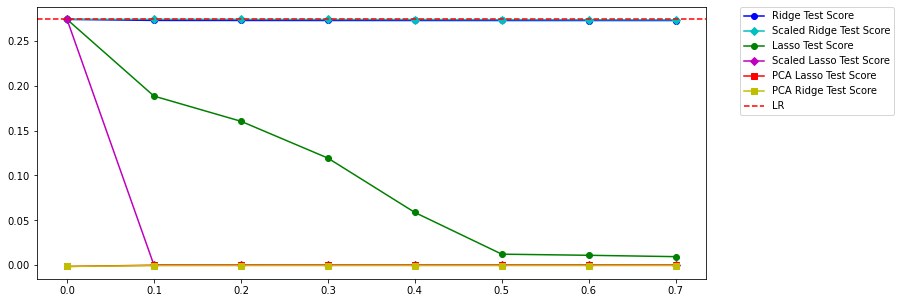

In [18]:
# print testing data for alphas up to 0.6
def plot_testing(d1,d2,d3,d4,d5,d6,d7,labels):
    f, ax = plt.subplots(1, 1, figsize = (12,5))
    plt.plot(labels, d1, 'b', marker='o', label='Ridge Test Score')
    plt.plot(labels, d2, 'c', marker='D', label='Scaled Ridge Test Score')
    plt.plot(labels, d3, 'g', marker='o', label='Lasso Test Score')
    plt.plot(labels, d4, 'm', marker='D', label='Scaled Lasso Test Score')
    plt.plot(labels, d6, 'r', marker='s', label='PCA Lasso Test Score')
    plt.plot(labels, d7, 'y', marker='s', label='PCA Ridge Test Score')
    
    plt.axhline(d5, c='r', linestyle='--', label= 'LR')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    
plot_testing(ridge_tst_score[:8], sc_ridge_tst_score[:8], lasso_tst_score[:8], 
             sc_lasso_tst_score[:8], lr_score_test,lasso_PCA_tst_score[:8], ridge_pca_tst_score[:8], alphas[:8] )

Based off of the data above we noticed that scaling did not help increase our scores by much. We also noticed that lasso eliminated features with alpha above 0 this decreased accuracy. This tells us that all of the features in our data set where helpful in predicting the quality of our wine. We also saw that pca did not help with predicting the quality of the wine. This tells us that there aren't any variances between features in our data set that are closely related.

Our best model predicted the quality of the wine with about 27% accuracy. This tells us that either the features of the wines in this data set are not a good predictor of the quality; or that a linear regression model is just not effective at predicting wine quality.



# Section 2 Question 2
## Binary Classification of Wines as Red and White

In this section we will attempt to build, train and test 4 different models for classifying wines as either red or white. We will also take a look at how normalizing our data affects the performance of each of these models. The four models we will look at are:
- Logistic Regression (using `liblinear` solver)
- K neighbours (using `KNeighborsClassifier`)
- Linear SVM (using `svm.SVC` with `kernel=linear`)
- Combined Model of the above (using `votingClassifier`)
After comparing the performance of these models with the original and normalized data, we will perform dimension reduction with `pca` and re-evaluate the models.
By the end of our analysis we will be able to answer which model is best suited for the original, normalized and reduced dimension data. 

### Section 2.1 Reading in and Populating DataFrames

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
white_path = "wine-white.csv"
red_path = "wine-red.csv"

def import_merge_df(file_name1, file_name2):
    #white wines
    df1 = pd.read_csv(file_name1)
    df1['type']='white'
    #red wines
    df2 = pd.read_csv(file_name2)
    df2['type']='red'
    print(df1.shape)
    print(df2.shape)
    # merge the dataframes 
    df = pd.concat([df1, df2], ignore_index=True)
    return df


df = import_merge_df(red_path, white_path)
df

(1599, 13)
(4898, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,white
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,white
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,white
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,white
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,red
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,red
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,red
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,red


### Section 2.2 Splitting data into features and labels

The 'type' of the wine is the label in this question, and the rest are the features.

In [20]:
features = df.drop('type',1)
labels = df['type']

print(features.shape, labels.shape)

(6497, 12) (6497,)


### Section 2.3 Finding best KNN 

Before we compare different models we need to narrow down which number of neighbours for `KNN` yields the highest train and test score. We will look at the weighted train test accuracies for all odd `k`'s in the range of `k` = 1 to `k` = 25.


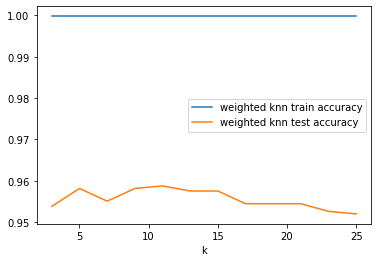

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Fixed seed for all different Ks
seed = 5026
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=seed)

def test_knn(k_range, X_train, X_test, y_train, y_test, **knn_params):
#     knn_tmp = pd.DataFrame()
    knn_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k,**knn_params)
        knn.fit(X_train, y_train)
        knn_score_train = knn.score(X_train, y_train)
        knn_score_test = knn.score(X_test, y_test)
        
        values = (k,knn_score_train,knn_score_test)
        knn_list.append(values)
    
    
    knn_tmp = pd.DataFrame(knn_list, columns =['k', 'train_score', 'test_score']).set_index('k')
    return knn_tmp


weights={'weights':'distance'}
knn_score_weighted = test_knn(range(3,26,2), x_train, x_test, y_train, y_test, **weights)

ax = knn_score_weighted.plot()
ax.legend(["weighted knn train accuracy", "weighted knn test accuracy","lr score"]);

In [22]:
bestK = knn_score_weighted['test_score'].idxmax()
print(bestK)

11


As we can see from above the `k` with the highest test accuracy is `k` = 11. We can now compare different models to find the model best fitted for predicted the type of wine.

### Section 2.4 Finding the best classifiers 

To accurately compare the performance of different models the models need to be trained and tested on the same data sets, we will achieve this by using a fixed random seed. We will loop over 30 seeds to get an average score for each of the models. 

The different models we are testing are 
- Logistic Regression (using `liblinear` solver)
- K neighbours (using `KNeighborsClassifier`)
- Linear SVM (using `svm.SVC` with `kernel=linear`)

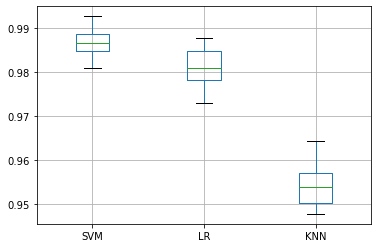

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

scores = {name: [] for name in ('SVM', 'LR', 'KNN')}

for seed in range(5000,5031):
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=seed)
   
    lsvc = svm.SVC(kernel='linear').fit(x_train, y_train)
    logisticRegr = LogisticRegression(max_iter=10000,solver = 'liblinear').fit(x_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=bestK,**weights).fit(x_train, y_train)

    
    scores['SVM'].append(lsvc.score(x_test,y_test))
    scores['LR'].append(logisticRegr.score(x_test,y_test))
    scores['KNN'].append(knn.score(x_test,y_test))
    

df = pd.DataFrame(scores)
df.boxplot()

From the results above the linear svm model seems to yeild the highest test prediction accuracy. However, this may not be the best approach, another way to increase the accuracy is the train multiple models and use an ensemble of them for predictions. 

### Section 2.5 Combined Ensemble Model

In this section we will train  `linear svm`, `logistic regression` and `kneighbours` models and create a combined model of the three. The combined model will use a voting classifier to decide between the three models.

In [24]:
from sklearn.ensemble import VotingClassifier

#create and return trained models
def create_models(x_train, y_train, k):
    models = []
    
    weights={'weights':'distance'}
    lsvc = svm.SVC(kernel='linear').fit(x_train, y_train)
    logisticRegr = LogisticRegression(max_iter=10000,solver = 'liblinear').fit(x_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=k,**weights).fit(x_train, y_train)
    
    models.append(lsvc)
    models.append(logisticRegr)
    models.append(knn)
    
    return models

models = create_models(x_train, y_train, bestK)

In [25]:
from scipy.stats import mode

#function used to predict for combined model
def predict(models, X):
    predictions = []
    for model in models:
        predictions.append(model.predict(X))
        result = mode(predictions)[0][0]
    return result

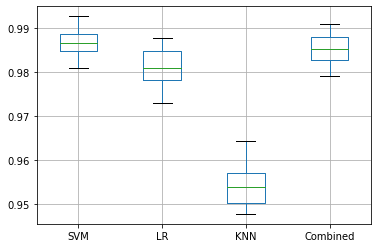

In [26]:
from sklearn.metrics import accuracy_score

scores = {name: [] for name in ('SVM', 'LR', 'KNN', 'Combined')}

for seed in range(5000,5031):
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=seed)
    
    model_list = create_models(x_train, y_train, bestK)
    combined_model = predict(model_list, x_test)
    
    scores['SVM'].append(model_list[0].score(x_test,y_test))
    scores['LR'].append(model_list[1].score(x_test,y_test))
    scores['KNN'].append(model_list[2].score(x_test,y_test))
    scores['Combined'].append(accuracy_score(y_test,combined_model))

df = pd.DataFrame(scores)
df.boxplot()



The graph below shows the mean scores for each of the models. Similar to the boxplot above, the `svm.SVC` model has the highest score.

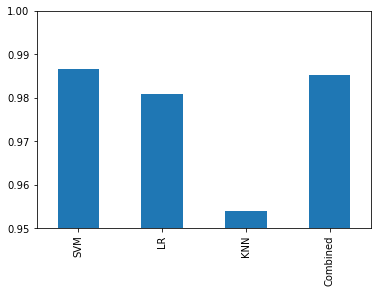

In [27]:
df.mean().plot.bar(ylim=(0.95,1.0))

We can see from above that the `svm.SVC` model remains as the model with the highest test scores, therefor this model is best suited to predict the wine type (red or white) based off of the features in our data set.

### Section 2.6 Normalizing data 

Normalizing data can be beneficial for multiple alogorithms, particulary ones that deal with distances and magnitudes. This means that normalizing should affect our KNN and SVM model scores. Below we will repeat the steps above but with normalized data. 

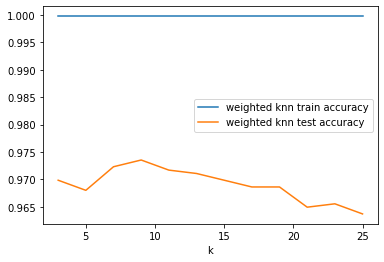

In [28]:
from sklearn.preprocessing import normalize

features_normalized = normalize(features, axis=1)

#same seed we evaluated all ks on above (without normalized data)
seed = 5026
x_train, x_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.25, random_state=seed)

weights={'weights':'distance'}
knn_score_weighted = test_knn(range(3,26,2), x_train, x_test, y_train, y_test, **weights)

ax = knn_score_weighted.plot()
ax.legend(["weighted knn train accuracy", "weighted knn test accuracy","lr score"]);

In [29]:
postNormalizationBestK = knn_score_weighted['test_score'].idxmax()
print(postNormalizationBestK)

9


After normalizing the data, the ideal number of neighbours to take into account is no longer `11`, but `9`.

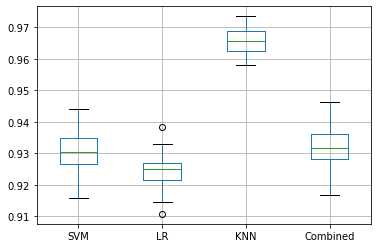

In [30]:
scores_normalized = {name: [] for name in ('SVM', 'LR', 'KNN', 'Combined')}

for seed in range(5000,5031):
    x_train, x_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.25, random_state=seed)
    
    #pass in updated k
    model_list = create_models(x_train, y_train, postNormalizationBestK)
    combined_model = predict(model_list, x_test)
    
    scores_normalized['SVM'].append(model_list[0].score(x_test,y_test))
    scores_normalized['LR'].append(model_list[1].score(x_test,y_test))
    scores_normalized['KNN'].append(model_list[2].score(x_test,y_test))
    scores_normalized['Combined'].append(accuracy_score(y_test,combined_model))


df_normalized = pd.DataFrame(scores_normalized)
df_normalized.boxplot()


After normalizing the data, we notice that the performance of the models changes significantly. The plot below compares the normalized model performances to those we saw before normalizing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012409126CD0>,
      dtype=object)

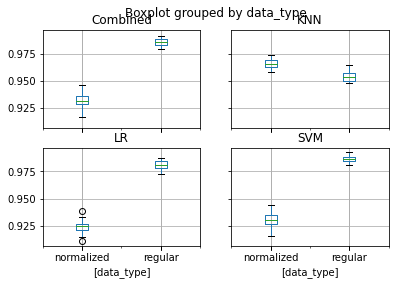

In [31]:
df_normalized['data_type'] = "normalized"

df['data_type'] = "regular"

df_merged = pd.concat([df_normalized, df], ignore_index=True)

df_merged.boxplot(by='data_type')

As we can see the only model who's performance improved after normalizing is the `KNN` model. This can be attributed to the fact that `KNN` depends on the distances between neighbours. Based off the normalized data, the `KNN` model yields the highest test score accuracy making it the best model to solve this problem. 

### Section 2.7 Dimension Reduction using PCA
In this section we will be repeating the previous steps of Section 2, but this time with dimension reduced data through PCA

#### Section 2.7.1 Finding ideal number of components for PCA

,explained variance
0,0.000000
1,0.740005
2,0.943718
3,0.970472
4,0.984737
5,0.995583
6,0.998867
7,0.999671
8,0.999832
9,0.999934


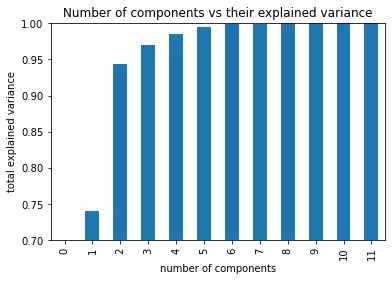

In [32]:
from sklearn.model_selection import train_test_split

#scale data first
features_norm = normalize(features)
#fixed seed for comparing different n_component numbers
seed = 5026
x_train, x_test, y_train, y_test = train_test_split(features_norm, labels, test_size=0.25, random_state=seed)

variance={'explained variance':[]}

for k in range(0,12):
    pca = PCA(n_components=k).fit(x_train)
    variance['explained variance'].append(pca.explained_variance_ratio_.sum())

df = pd.DataFrame(variance)

ax = df.plot.bar(ylim=(0.70,1.001),title="Number of components vs their explained variance")
ax.set_xlabel("number of components")
ax.set_ylabel("total explained variance")
ax.get_legend().remove()

df

The graph above shows different components and their explained variances. There is no way to get 100% explained variation, however it is possible to get close. In `Jake VanderPlas`'s `Python Data Science Handbook` he states that having anywhere over 90% of the total variance explained is good enough to model the dataset. In our case all of the explained variances for components higher than or equal to 2 have sufficient explained variance. Since we are trying to reduce the number of componenets as far as possible, we chose 2 as the number of components to use.

#### Section 2.7.2 Finding best KNN (With PCA)

Similar to before we are going to compare different K values, but using the transformed data from `PCA`.

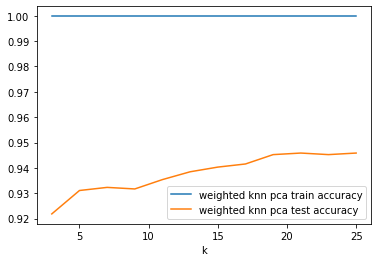

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#Fixed seed for all different Ks
seed = 5026
x_train, x_test, y_train, y_test = train_test_split(features_norm, labels, test_size=0.25, random_state=seed)

#number of components from above
comp_num = 2

pca = PCA(n_components=comp_num)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

def test_knn(k_range, X_train, X_test, y_train, y_test, **knn_params):
#     knn_tmp = pd.DataFrame()
    knn_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k,**knn_params)
        knn.fit(X_train, y_train)
        knn_score_train = knn.score(X_train, y_train)
        knn_score_test = knn.score(X_test, y_test)
        
        values = (k,knn_score_train,knn_score_test)
        knn_list.append(values)
    
    
    knn_tmp = pd.DataFrame(knn_list, columns =['k', 'train_score', 'test_score']).set_index('k')
    return knn_tmp


weights={'weights':'distance'}
knn_score_weighted = test_knn(range(3,26,2), x_train, x_test, y_train, y_test, **weights)

ax = knn_score_weighted.plot()
ax.legend(["weighted knn pca train accuracy", "weighted knn pca test accuracy","lr score"]);

In [34]:
pcaBestK = knn_score_weighted['test_score'].idxmax()
print(pcaBestK)

21


As we can see from above the `k` with the highest test accuracy is `k` = 21. We can now compare different models to find the model best fitted for predicted the type of wine. Previously, when PCA was not used, k was 9 (for normalized data). 

#### Section 2.7.3 Finding best classifiers (With PCA)

In this section we will retrain all models (including the combined model) with the `PCA` dimension reduced data

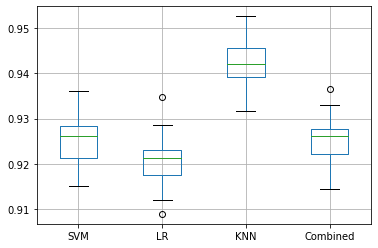

In [35]:
scores_normalized = {name: [] for name in ('SVM', 'LR', 'KNN', 'Combined')}

for seed in range(5000,5031):
    x_train, x_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.25, random_state=seed)
   
    pca = PCA(n_components=comp_num)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    
    #pass in updated k
    model_list = create_models(x_train, y_train, pcaBestK)
    combined_model = predict(model_list, x_test)
    
    scores_normalized['SVM'].append(model_list[0].score(x_test,y_test))
    scores_normalized['LR'].append(model_list[1].score(x_test,y_test))
    scores_normalized['KNN'].append(model_list[2].score(x_test,y_test))
    scores_normalized['Combined'].append(accuracy_score(y_test,combined_model))


df_pca = pd.DataFrame(scores_normalized)
df_pca.boxplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000124090684F0>,
      dtype=object)

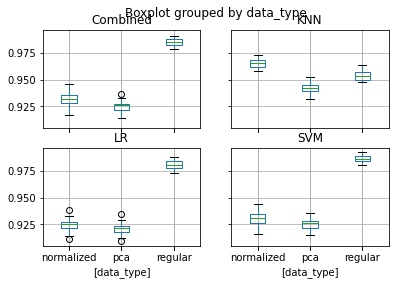

In [36]:
df_pca['data_type'] = "pca"

df_merged2 = pd.concat([df_merged, df_pca], ignore_index=True)

df_merged2.boxplot(by='data_type')

We can see from above that the `KNN` model remains as the model with the highest test scores, therefore this model is best suited to predict the wine type (red or white) based off of the features in our data set. This is the same as the normalized Data, However, for this version with PCA applied, the overall scores for all models are lower.

### Section 2.8 Overall Results 

The best model for each case is outlined below:
- Regular Data:  Linear SVM (using `svm.SVC` with `kernel=linear`)
- Normalized Data: K neighbours (using `KNeighborsClassifier`)\
- Dimension Reduced Data: K neighbours (using `KNeighborsClassifier`)

Overall the best model was the SVM model with the raw data that had not been normalized. We were quite successful at determining the type of wine from these parameters. Next we will see if we can cluster these wines based on type and quality.

## Section 3

### Preprocessing

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import Markdown
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

red_wine = pd.read_csv(red_path)
white_wine = pd.read_csv(white_path)

white_wine['label'] = 'default'
red_wine['label'] = 'default'
# function labels the white as being good or bad based on 
# the threshhold value provided
def labelWine(threshhold, wine_type, data): 
    for index, row in data.iterrows():
        number = -1
        if wine_type == "red":
            number = 0        
        elif wine_type == "white":
            number = 2   
        quality = row['quality']
        if quality<threshhold: 
            data.at[index,'label'] = number
        else:
            data.at[index,'label'] = number+1
            
    return data
#labeling the wine as being good or bad for both white and red whites
red_wine = labelWine(6, "red", red_wine)  
white_wine = labelWine(6, "white",white_wine)     
#combining the red and white wine dataset after labeling 
wine = pd.concat([red_wine,white_wine], ignore_index=True) 


temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
feature_scaled = scale(feature) # scaling the features data

### Applying PCA

In [38]:
from sklearn.decomposition import PCA


#normalize features first
feature_norm = normalize(feature)
variance={'explained variance':[]}

#number of components to use for PCA
comp_num = 2

pca = PCA(n_components=comp_num)
pca.fit(feature_norm)
feature_PCA = pca.transform(feature_norm)


###  3 Clustering the dataset into 4 clusters  (KMeans, DBScan, and Agglomerative Clustering)
- We will use numerous clustering methods to see if we can use our features to segement our samples into four distinct groups, good white, good red, bad white, and bad red.
- Good and bad wine will be determined by its quality rating. Any wine with a rating below 6 is bad and 6 and above is good.
- The red and white labels are derived from the dataset that the wine comes from. 

### 3.1 KMeans

In [39]:
temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
# scaling the features data
feature_scaled = scale(feature) 


scores = {name: [] for name in ('auto', 'full', 'elkan')}
scores_scaled = {name: [] for name in ('auto', 'full', 'elkan')}
scores_PCA = {name: [] for name in ('auto', 'full', 'elkan')}

for algorithm in ('auto', 'full', 'elkan'): # test different seed values with different algorithms and check the ARI scores
    for seed in np.arange(0, 10):
        kmeans = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans_scaled = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans_PCA = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        
        
        kmeans.fit(feature)
        kmeans_scaled.fit(feature_scaled)
        kmeans_PCA.fit(feature_PCA)
        
        ARI_score = metrics.adjusted_rand_score(kmeans.labels_ ,labels)
        ARI_score_scaled = metrics.adjusted_rand_score(kmeans_scaled.labels_ ,labels)
        ARI_score_PCA = metrics.adjusted_rand_score(kmeans_PCA.labels_ ,labels)
        
        array = kmeans.labels_
        array_pca = kmeans_PCA.labels_
        
        scores[algorithm].append(ARI_score)
        scores_scaled[algorithm].append(ARI_score_scaled)
        scores_PCA[algorithm].append(ARI_score_PCA)
        
#         print(algorithm, seed, ARI_score)

        


median_auto = np.median(np.array(scores['auto'])) # scores from non scaled features
median_full = np.median(np.array(scores['full']))
median_elkan = np.median(np.array(scores['elkan']))     

median_auto_scaled = np.median(np.array(scores_scaled['auto'])) # scores from scaled features
median_full_scaled = np.median(np.array(scores_scaled['full']))
median_elkan_scaled = np.median(np.array(scores_scaled['elkan']))  

median_auto_PCA = np.median(np.array(scores_PCA['auto'])) # scores from PCA reduced features
median_full_PCA = np.median(np.array(scores_PCA['full']))
median_elkan_PCA = np.median(np.array(scores_PCA['elkan']))  


display(Markdown(\
f'|[]()|Median scores|\n{"|---"*2}|\n'
f'|**auto**|{median_auto:.4}|\n'
f'|**full**|{median_full:.4}|\n'
f'|**elkan**|{median_elkan:.4}|\n'))

display(Markdown(\
f'|[]()|Median scores scaled|\n{"|---"*2}|\n'
f'|**auto**|{median_auto_scaled:.4}|\n'
f'|**full**|{median_full_scaled:.4}|\n'
f'|**elkan**|{median_elkan_scaled:.4}|\n'))

display(Markdown(\
f'|[]()|Median scores PCA|\n{"|---"*2}|\n'
f'|**auto**|{median_auto_PCA:.4}|\n'
f'|**full**|{median_full_PCA:.4}|\n'
f'|**elkan**|{median_elkan_PCA:.4}|\n'))

|[]()|Median scores|
|---|---|
|**auto**|0.1792|
|**full**|0.1792|
|**elkan**|0.1792|


|[]()|Median scores scaled|
|---|---|
|**auto**|0.3223|
|**full**|0.3223|
|**elkan**|0.3223|


|[]()|Median scores PCA|
|---|---|
|**auto**|0.1906|
|**full**|0.1906|
|**elkan**|0.1906|


### Results (KMEANS)
- We first tried scaling the data along axis = 1 and that gave us the same result as the raw data, so we did not pass an axis argument. Scaling the data this way improved our results.
- In regards to the algorithm selected for the kmeans testing it appears to not have an impact on the result as shown by the tables above.
- The medians that we recieved after finding the ARI scores from 0-9 are 0.1792, this was unscaled.
- After scaling the features we achieved a better ARI score of 0.3223.
- Overall we found that KMEANS was not very effective at clustering the wines into 4 groups. We may be able to get a better result if we use another clustering method. Another possibility is that the features don't allow us to separate the data into 4 distinct groups. 


### Results (Kmeans) PCA
- PCA performed better than the base featureset, but worse than the scaled featureset
- They all performed fairly poorly. 

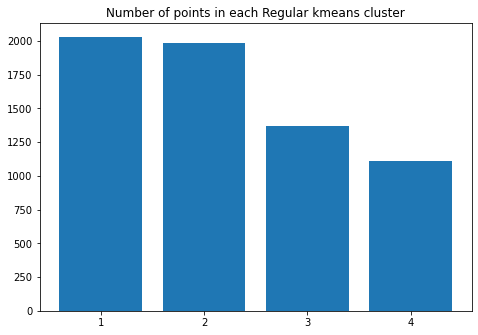

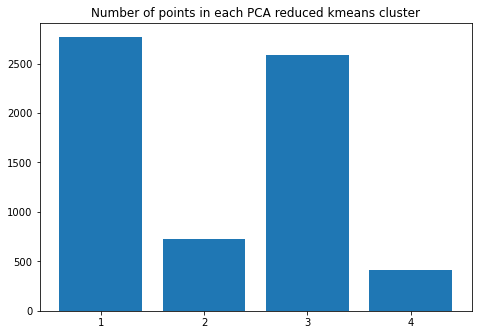

In [40]:
# plotting the number of points in each cluster
zero = np.count_nonzero(array==0)
one = np.count_nonzero(array==1)
two = np.count_nonzero(array==2)
three = np.count_nonzero(array==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

ax.set_title("Number of points in each Regular kmeans cluster")
plt.show()


#plotting number of points in each cluster For PCA reduced Data
zero = np.count_nonzero(array_pca==0)
one = np.count_nonzero(array_pca==1)
two = np.count_nonzero(array_pca==2)
three = np.count_nonzero(array_pca==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

ax.set_title("Number of points in each PCA reduced kmeans cluster")
plt.show()


### 3.2 DBSCAN
- test different eps values with different min_samples values and plot the results
- find the combination that provides the highest score 
- use scaled data to improve results

max value is: 0.23513134334058194
eps:  10
min_samples:  200


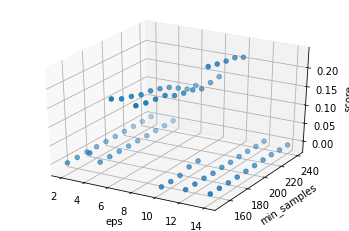

In [41]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
feature_scaled = scale(feature) # scaling the features data


# testing different min_sample values with different eps and recording the best ARI scores 
def db_results(features, eps_range):
    xs = []
    ys = []
    zs = []
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    max_value = 0 
    max_eps = -5
    samples_ = -5
# testting different min_sample values with different eps and recording the best ARI scores     
    for eps in eps_range:  
        for samples in range(150, 250, 10):
            
            xs.append(eps)
            ys.append(samples)
            # first use the non scaled features
            db = DBSCAN (eps = eps , min_samples = samples)
            db.fit(features)
            
            ARI_score = metrics.adjusted_rand_score(db.labels_,labels)
#             print(ARI_score)
            zs.append(ARI_score)
            if ARI_score > max_value:
                max_value = ARI_score
                max_eps = eps
                samples_ = samples
            
    print("max value is:", max_value)
    print("eps: ", max_eps)
    print("min_samples: ", samples_)

    ax.scatter(xs, ys, zs)
    ax.set_xlabel('eps')
    ax.set_ylabel('min_samples')
    ax.set_zlabel('score')
    # plotting a 3d graph to compare the ARI score based on 
    # different eps and min_sample values using scaled features data
    plt.show()    

db_results(feature, np.arange(2,16,2))

max value is: 0
eps:  -5
min_samples:  -5


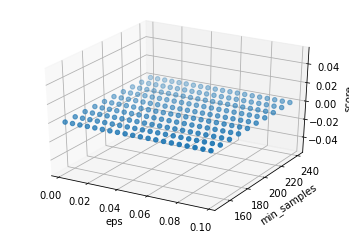

In [42]:
low_eps = np.arange(0.002,0.1,0.005)
db_results(feature_scaled, low_eps)

### Now re-run with different scalers

max value is: 0
eps:  -5
min_samples:  -5


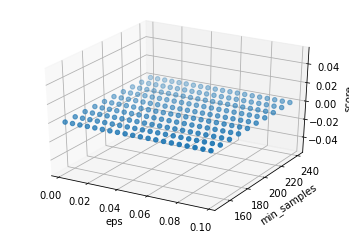

In [43]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler
# min max scaler
min_max_scaler = MinMaxScaler().fit(feature)
mm_feat = min_max_scaler.transform(feature)
db_results(mm_feat, low_eps)

max value is: 0.3122646750921726
eps:  0.052000000000000005
min_samples:  240


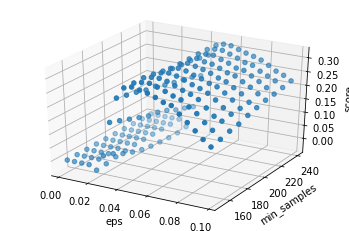

In [44]:
# normalizer scaler
norm_scaler = Normalizer().fit(feature)
norm_feat = norm_scaler.transform(feature)
db_results(norm_feat, low_eps)

max value is: 0
eps:  -5
min_samples:  -5


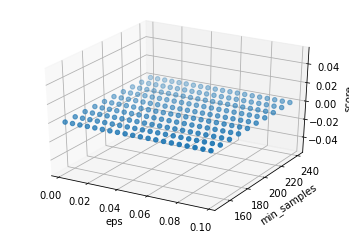

In [45]:
# robust scaler
rob_scaler = RobustScaler().fit(feature)
rob_feat = rob_scaler.transform(feature)
db_results(rob_feat, low_eps)

### Results (DBscan)
- We tried 4 types of scaling to help improve our results. Scaling the data did not help improve our results. The best results were obtained with the raw data set. 
- The data was tested using mutile eps and min_samples values, this allowed us to find optimal parameters to improve our clustering results.
- The highest ARI score we achieved was 0.235 with eps = 10 and min_samples = 200

### Now test the pca feature set

max value is: 0.3232551912681926
eps:  0.037000000000000005
min_samples:  190


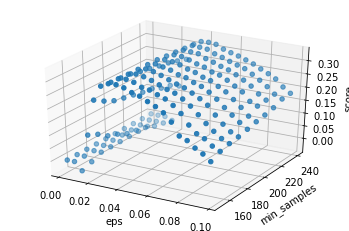

In [46]:
db_results(feature_PCA, low_eps)

### Results (DBscan) With PCA reduction
- the data was tested using mutile eps and min_samples values
- Since the PCA data is normalized, it needed to be tested using much smaller values of eps than the regular feature set.
- Highest ARI Score acheived was 0.324, with eps=0.037 and min_samples=190
- These results are notable, because a higher ARI score was acheived than for the base Data set (0.235 with eps = 10 and min_samples = 200)

### 3.3 Agglomerative Clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, RobustScaler

# split the labels and features
temp = wine.drop('quality',1)
labels = temp['label']
features = temp.drop('label',1)

names = ['ward euclidean', 'complete euclidean', 'average euclidean', 'single euclidean',
        'complete l1', 'average l1', 'single l1', 'complete l2', 'average l2', 'single l2']

def scale_fit(scaler, features, labels):
    
    sc_features = features.copy()
    scaler.fit(sc_features)
    # need to transform the features
    sc_features = scaler.transform(sc_features)
    scores = aggclust_initial(sc_features, labels, 4)
    return scores

def aggclust_initial(features, labels, n_clust):
    scores = {name: [] for name in ('ward', 'complete', 'average', 'single', 'ward euclidean',
                                    'complete euclidean', 'average euclidean', 'single euclidean',
                                    'complete l1', 'average l1', 'single l1',
                                    'complete l2', 'average l2', 'single l2')}
    for linkage_mode in ('ward', 'complete', 'average', 'single'):
        for affinity in ('euclidean', 'l1', 'l2'):
            if linkage_mode == 'ward' and affinity != 'euclidean':
                pass
            else:
                clust = AgglomerativeClustering(n_clusters = n_clust, affinity = affinity, 
                                                linkage = linkage_mode).fit(features)
                ARI_score = metrics.adjusted_rand_score(labels, clust.labels_)
                scores[linkage_mode + ' ' + affinity].append(ARI_score)
                scores[linkage_mode].append(ARI_score)
                
            
    return scores


# intitial results no scaling                
scores = aggclust_initial(features, labels, 4)

# scale the data
sc_features = scale(features, axis = 1)

# results with scaling
sc_scores = aggclust_initial(sc_features, labels, 4)
# with PCA reduced Data
PCA_scores = aggclust_initial(feature_PCA,labels,4)


In [48]:
# scale with different methods.
mm_scaler = MinMaxScaler()
n_scaler = Normalizer()
r_scaler = RobustScaler()


# transform the data and fit a model with that data

mm_scores = scale_fit(mm_scaler, features, labels)

n_scores = scale_fit(n_scaler, features, labels)

r_scores = scale_fit(r_scaler, features, labels)

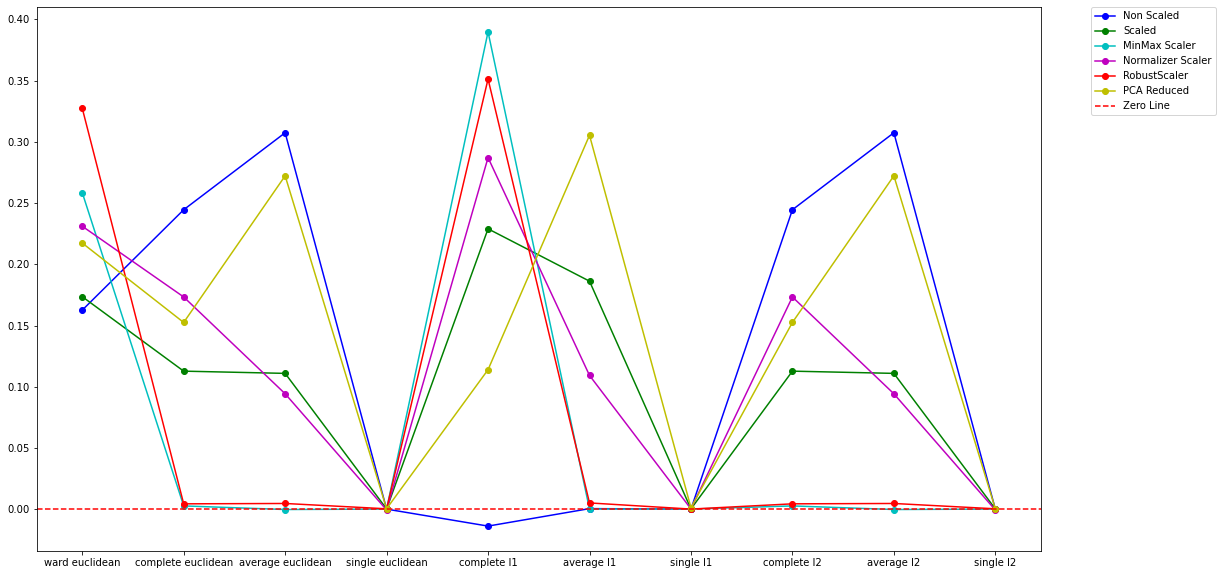

In [49]:
# setup data to display results

def setup_chart_data(score_lst, names):
    values = []
    for name in names:
        values.append(score_lst[name][0])
    return values
        
values = setup_chart_data(scores, names)
sc_values = setup_chart_data(sc_scores, names)
mm_values = setup_chart_data(mm_scores, names)
n_values = setup_chart_data(n_scores, names)
r_values = setup_chart_data(r_scores, names)
PCA_values = setup_chart_data(PCA_scores, names)

    
# plot the data  
f, ax = plt.subplots(1, 1, figsize = (18,10))
plt.plot(names, values, 'b', marker='o', label = 'Non Scaled')
plt.plot(names, sc_values, 'g', marker='o', label = 'Scaled')
plt.plot(names, mm_values, 'c', marker='o', label = 'MinMax Scaler')
plt.plot(names, n_values, 'm', marker='o', label = 'Normalizer Scaler')
plt.plot(names, r_values, 'r', marker='o', label = 'RobustScaler')
plt.plot(names, PCA_values, 'y', marker='o', label = 'PCA Reduced')


plt.axhline(0, c='r', linestyle='--', label= 'Zero Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### Results
- When we visualize the results we see that the scaled data does not always perform better than the raw data. We also see that the scaled data typically works better when linkage = 'complete' and affinity = 'l1'. 
- Overall the non scaled data worked best with linkage = 'average' and affinity = 'euclidean'. 
- The best performing model used complete l1 with the data scaled with the min max scaler.

### Results with PCA
- When we visualize the results we see that the PCA reduced data, in general does not perform much better or worse than any other type of data.  
- Overall the PCA reduced data worked best with linkage = 'average' and affinity = 'l1'. 
- The PCA reduced data did not outperfomrm the previous best performing model, which used complete l1 with the data scaled with the min max scaler.

### Create a Dendogram
- This will help us see the clusters that exist within our models based on the type of data that we use 

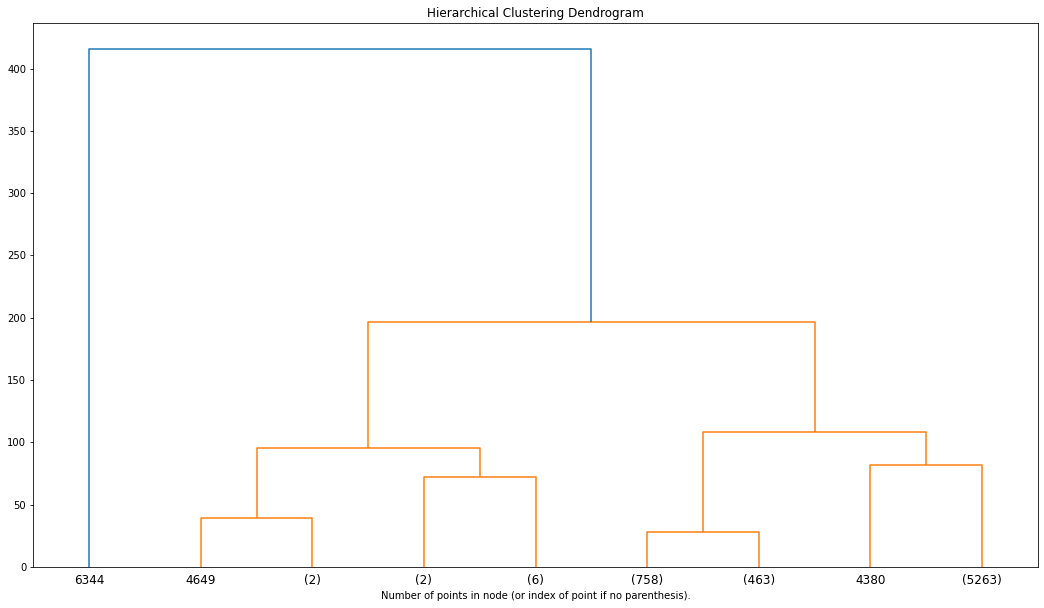

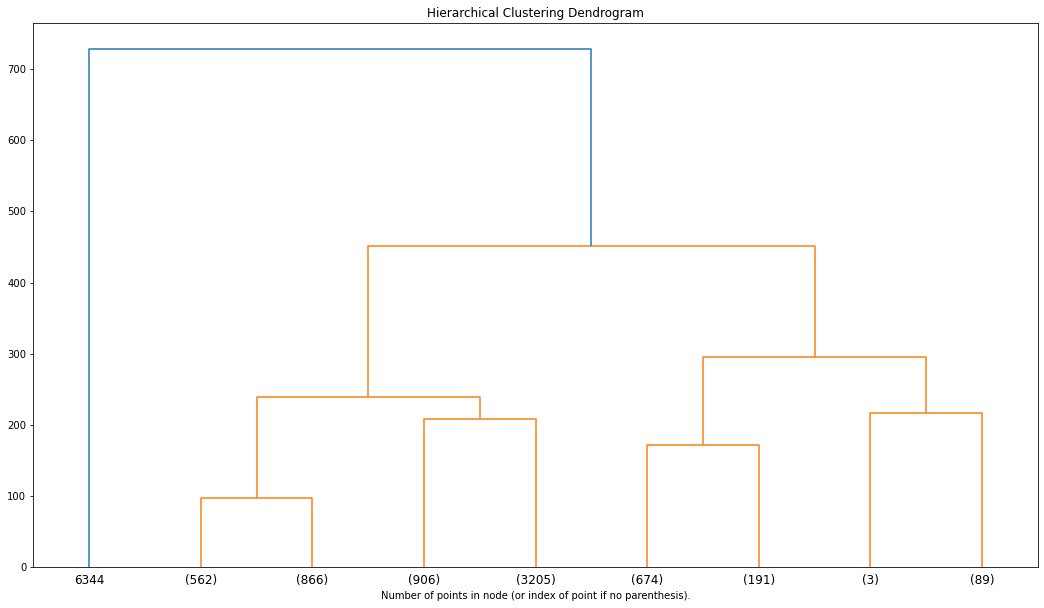

In [50]:
from scipy.cluster.hierarchy import dendrogram
# code taken from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def setup_dendogram(features, model):
    model = model.fit(features)    
    f, ax = plt.subplots(1, 1, figsize = (18,10))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    

    
# setting distance_threshold=0 ensures we compute the full tree.
# create a model to view dendogram with the raw data
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'average', affinity = 'euclidean')

# create a model to view dendogram with the scaled data
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'complete', affinity = 'l1')

# create a model to view pca dendogram
model3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                linkage = 'average', affinity = 'l1')

# create dendograms to compare the models cluster distances
setup_dendogram(features, model)
setup_dendogram(features, model2)


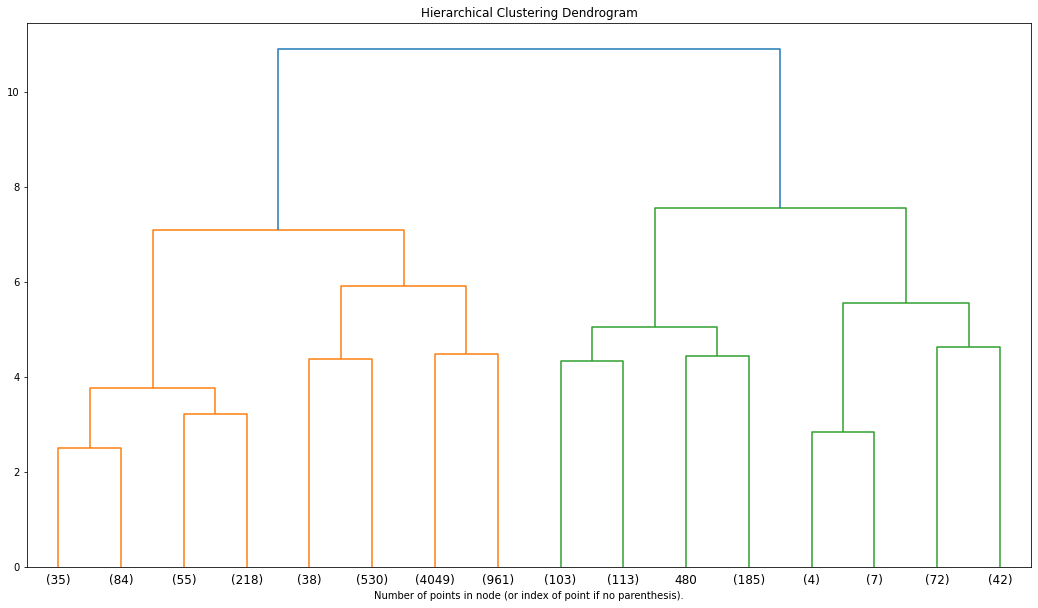

In [51]:
# visualize the dendogram for the scaled features and its ideal model
setup_dendogram(sc_features, model2)

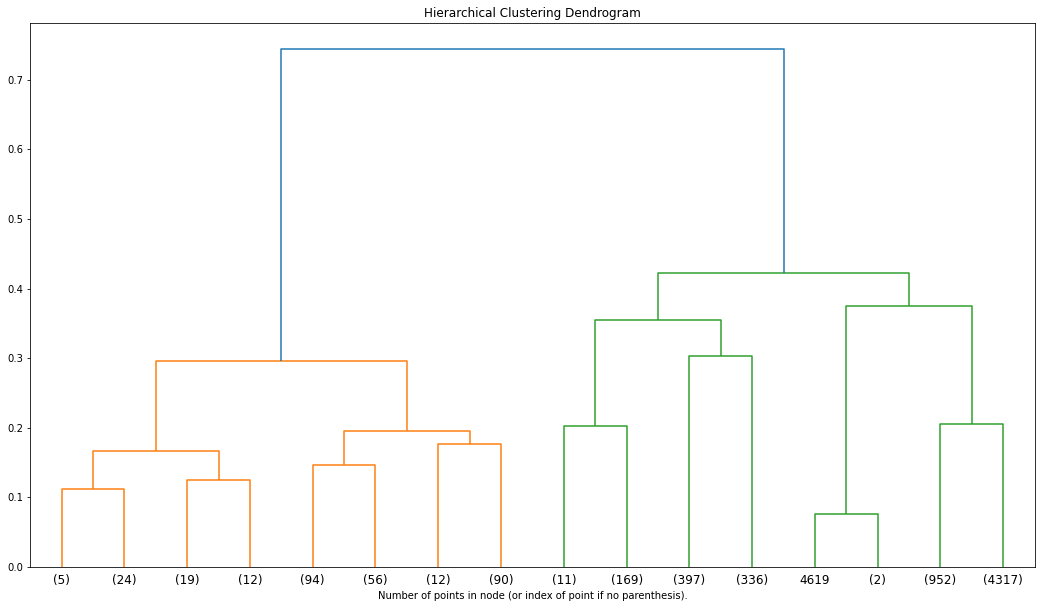

In [52]:
# visualize the dendogram for the pca features and its ideal model
setup_dendogram(feature_PCA, model3)

### Scaled Data
- Again we see that the ideal model works better to create 4 distinct groups
- We also see that it there is a small disntance between the 4 distinct groups
- It is interesting that we don't see section with 4 distinct groups for the PCA data with it's ideal model

### Now we will compare the other scalers

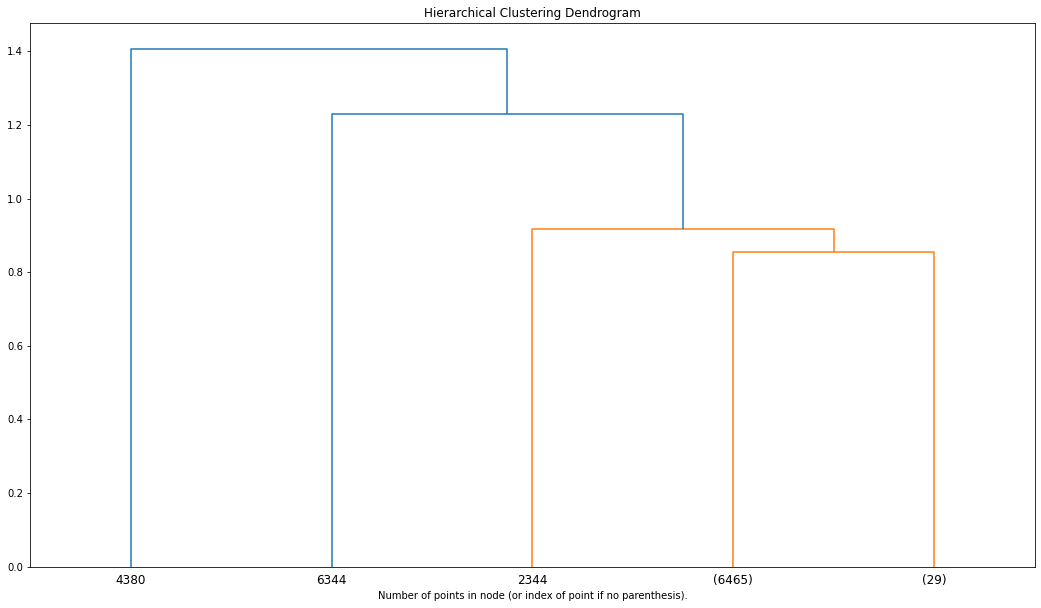

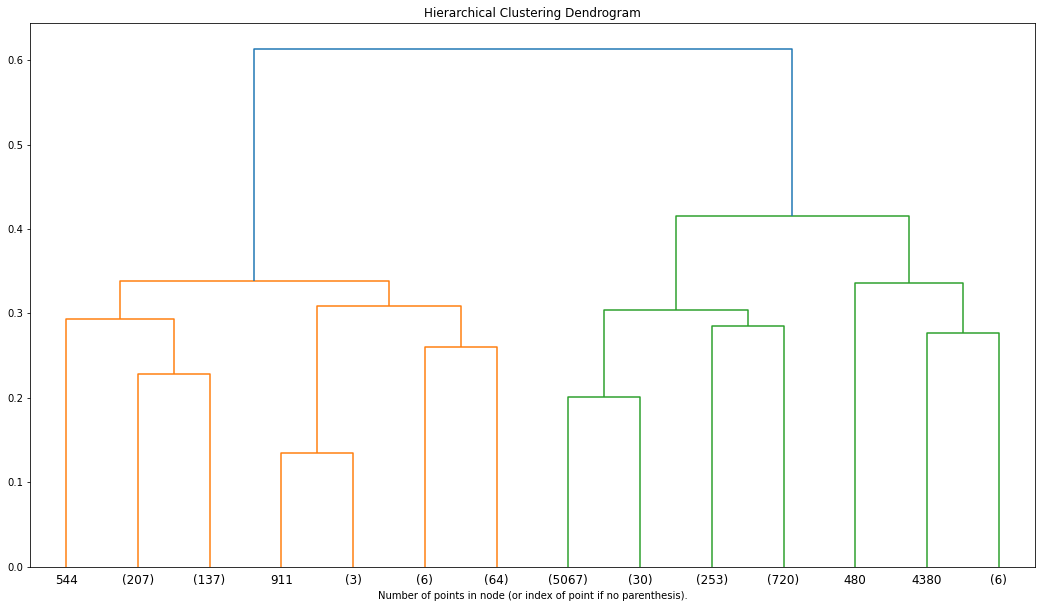

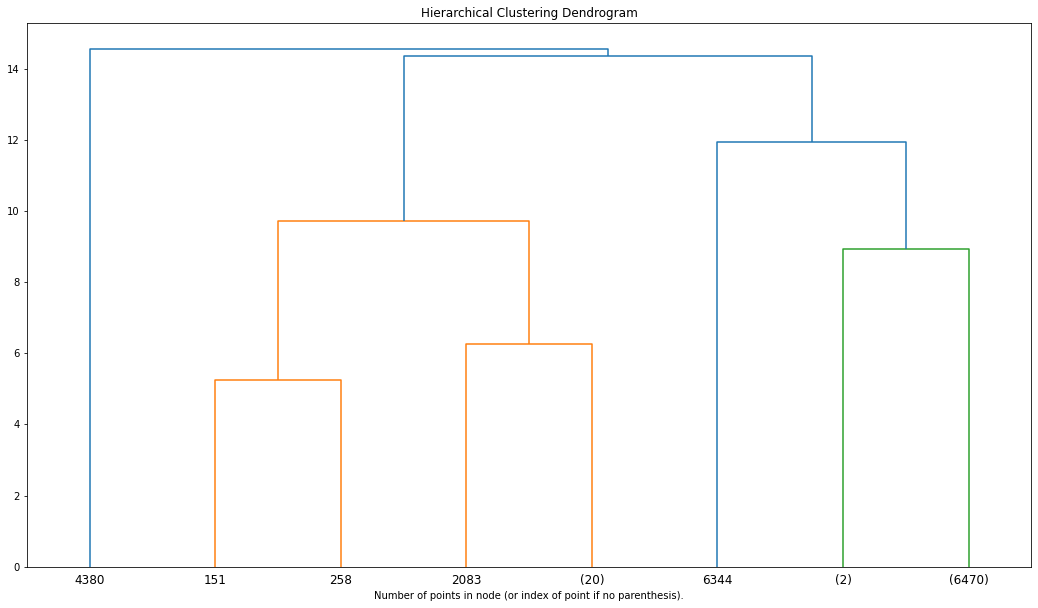

In [53]:
def setup_dendogram_scaled(scaler, features, model):
    
    scaler.fit(features)
    features = scaler.transform(features)
    model = model.fit(features)    
    f, ax = plt.subplots(1, 1, figsize = (18,10))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
setup_dendogram_scaled(mm_scaler, features, model)

setup_dendogram_scaled(n_scaler, features, model)

setup_dendogram_scaled(r_scaler, features, model)

### Results
- These dendograms show us the arrangement of the clusters. We can see that the greatest difference would occur if we tried to group the wines into two clusters. This makes sense as we did initially have two separate groups of wine, red and white. Our goal was to see if the wines can be separated into 4 clusters. Good Red, Bad Red, Good White and Bad White. The dendogram shows us that our features do not provide us with 4 well defined groups. A group of three or two would provide us with clusters with greater distance between the groups. 
- The minmax scaler clearly works the best to segment the data into clusters. It shows us that the wines can clearly be broken into 5 clusters with this scaler. 
- We could use this information to try to group our wines differently and see if that made a difference. This would require us to go back through the data and assign different labels
- Overall we found that Agglomerative testing did not work well to separate the wines into 4 groups.

### Results (PCA)
- For Kmeans Clustering, PCA did not slightly outperforms the base featureset, however does not outperform the scaled featureset
- For DBScans Clustering, PCA actually performed the best out of all featuresets that were used
- For Agglomerative clustering, PCA did not perform significantly better or worse than the other featuresets

# Final Results 
- For KMEANS clustering we got the best results when we used scaled values, we achieved an ARI score of 0.3223
- For DBscan clustering our best results was achieved using scaled data and having eps = 10 and min_samples = 200, we achieved a ARI score of 0.235
- For Agglomerative clustering our best performing model used complete l1 with the data scaled wit the min max scaler, the ARI score that we achieved was 0.38971
- We found it interesting that there was not a single scaler that improved the results accross the different
- It was also interesting to see how different the results were between clustering techniques and the number of parameters that could be tweaked to improve their accuracy.
- We found it quite hard to tune and use the eps parameter. Readings online didn't help us find a way to choose a better range.
- When it came to using dimension reduction with PCA we found that it did not improve the results for any of our data sets. As discussed before this tells us that none of our features have a strong corelation between them in our data set. 

Overall we would say that these feaures do not allow us to cluster the data into our 4 clusters, Good Red, Bad Red, Good White, and Bad white. Our analysis of the dendograms indicates that there are not 4 well defined clusters that emerge from these features. The dendograms indicated that there could be 3 or 5 distinct groups but we don't know what these are or how to label them. 